<a href="https://colab.research.google.com/github/marciofag/py-avaliacao-modelos-classificacao/blob/main/avaliacao_modelos_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Modelos de Classificação
## Objetivos:

Aplicar métricas de avaliação de modelos, como AUC e Curva ROC.
Construir e interpretar uma matriz de confusão.
Calcular e analisar métricas como Precision, Recall e F1-Score.
Otimizar um modelo de classificação com base nas métricas avaliadas.

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

In [2]:
# Gerar dataset sintético
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=2,
    random_state=42, n_classes=2
)

# Dividir em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamanho treino: {X_train.shape}, Tamanho teste: {X_test.shape}")

Tamanho treino: (700, 10), Tamanho teste: (300, 10)


AUC: 0.99


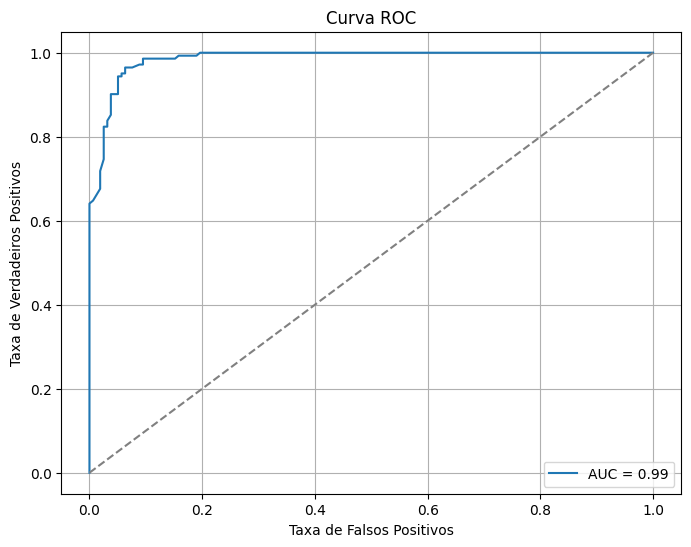

In [7]:
# Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões e probabilidades
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# AUC e Curva ROC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

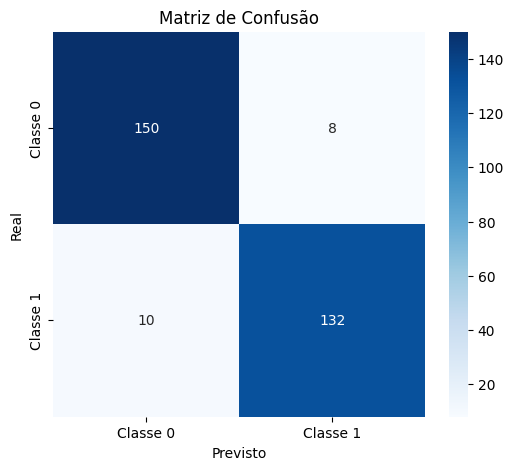

In [4]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Classe 0", "Classe 1"],
            yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [5]:
# Métricas: Precision, Recall, F1-Score
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=["Classe 0", "Classe 1"]))

Relatório de Classificação:

              precision    recall  f1-score   support

    Classe 0       0.94      0.95      0.94       158
    Classe 1       0.94      0.93      0.94       142

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [6]:
# Comparação de Thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    print(f"\nThreshold: {threshold:.1f}")
    print(confusion_matrix(y_test, y_pred_threshold))
    print(classification_report(y_test, y_pred_threshold, target_names=["Classe 0", "Classe 1"]))
    print("-" * 60)



Threshold: 0.1
[[ 91  67]
 [  0 142]]
              precision    recall  f1-score   support

    Classe 0       1.00      0.58      0.73       158
    Classe 1       0.68      1.00      0.81       142

    accuracy                           0.78       300
   macro avg       0.84      0.79      0.77       300
weighted avg       0.85      0.78      0.77       300

------------------------------------------------------------

Threshold: 0.2
[[124  34]
 [  0 142]]
              precision    recall  f1-score   support

    Classe 0       1.00      0.78      0.88       158
    Classe 1       0.81      1.00      0.89       142

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.91      0.89      0.89       300

------------------------------------------------------------

Threshold: 0.3
[[136  22]
 [  2 140]]
              precision    recall  f1-score   support

    Classe 0       0.99      0.86      0.92       15

## Com base nos resultados apresentados:

### 1.	**Qual foi o valor da AUC? O que ele indica sobre o modelo?**

 O valor da AUC foi de 0.99. Um valor de AUC próximo de 1.0 indica que o modelo tem uma excelente capacidade de distinguir entre as classes positiva e negativa. Neste caso, 0.99 sugere que o modelo é quase perfeito em classificar corretamente as instâncias.

### 2.	**A matriz de confusão mostra um bom equilíbrio entre classes?**

 A matriz de confusão para o threshold padrão (0.5) foi:
 > [[150   8]
 > [ 10 132]]

 Ela mostra 150 verdadeiros negativos (TN), 8 falsos positivos (FP), 10 falsos negativos (FN) e 132 verdadeiros positivos (TP).
 Os números de verdadeiros positivos e verdadeiros negativos são relativamente próximos (132 vs 150), e os falsos positivos e falsos negativos são baixos. Isso sugere que o modelo está performando bem em ambas as classes, indicando um bom equilíbrio na classificação para este threshold.

### 3.	**Quais são os valores de Precision, Recall e F1-Score para a Classe 1?**

 Para o threshold padrão (0.5), os valores são:
 - Precision (Classe 1): 0.94
 - Recall (Classe 1): 0.93
 - F1-Score (Classe 1): 0.94

### 4.	**Como a mudança do threshold afeta a performance do modelo?**

 A mudança do threshold afeta o trade-off entre Precision e Recall.
 - Diminuir o threshold (ex: 0.1, 0.2) aumenta o Recall para a Classe 1 (o modelo identifica mais positivos reais), mas diminui a Precision para a Classe 0 (mais negativos são classificados incorretamente como positivos). Isso resulta em mais Falsos Positivos e menos Falsos Negativos.
 - Aumentar o threshold (ex: 0.7, 0.8, 0.9) aumenta a Precision para a Classe 1 (quando o modelo prevê positivo, é mais provável que esteja correto), mas diminui o Recall para a Classe 1 (o modelo perde mais positivos reais). Isso resulta em mais Falsos Negativos e menos Falsos Positivos. Observando os resultados para diferentes thresholds, fica claro esse comportamento.

### 5.	**Baseado nos resultados, qual threshold parece mais adequado?**

 A escolha do threshold mais adequado depende do objetivo do problema.
 - Se o objetivo é minimizar Falsos Negativos (identificar o máximo de casos positivos reais, mesmo que isso gere mais Falsos Positivos), um threshold menor (como 0.1 ou 0.2) seria mais adequado, pois o Recall da Classe 1 é mais alto nesses casos.
 - Se o objetivo é minimizar Falsos Positivos (garantir que, quando o modelo prevê positivo, a chance de estar correto é alta), um threshold maior (como 0.8 ou 0.9) seria mais adequado, pois a Precision da Classe 1 é mais alta nesses casos.
 - Se o objetivo é ter um bom equilíbrio entre Precision e Recall para ambas as classes, o threshold padrão de 0.5 parece ser um bom ponto de partida, pois os valores de Precision, Recall e F1-Score são altos e equilibrados para ambas as classes, e a acurácia geral também é alta. O threshold de 0.4 também apresenta resultados muito semelhantes e equilibrados.
Portanto, a escolha final depende da prioridade do negócio: minimizar Falsos Positivos ou Falsos Negativos. Para um desempenho geral equilibrado, thresholds próximos a 0.4 ou 0.5 são adequados.
